# Homework 4: More Simulation and the Central Limit Theorem 
***

**Name**: Matthew Sredojevic

***

This assignment is due on Moodle by **5pm on Friday March 16th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/dblarremore/csci3022/blob/master/resources/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [27]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy import stats
%matplotlib inline

### [35 points] Problem 1 - Monte Carlo Estimation of Definite Integrals 
***

One really cool application of random variables is using them to approximate integrals/area under a curve.  This method of approximating integrals is used constantly in computational science to approximate really difficult integrals that we never want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on a very simple integral. 

**Part A** Compute by-hand, the integral $f(x) = \sin(x)$ for $0 \leq x \leq \pi$.

$\int_0^{\pi}sin(x)\ dx$ = $-cos(x)\ \big|_0^{\pi} +\ C$

$-cos(\pi)\ -\ (-cos(0))\ =\ -(-1)\ - (-(1)) = 2$

**Part B**: Suppose we sample a random variable $X$ from $U(0,\pi)$ and another random variable $Y$ from $U(0,1)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,\pi] \times [0,1]$.  If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

The value estimated here is the probability that some X and Y correspond to a point under the curve

**Part C**: How could we modify the process outlined in **Part B** so that our estimator estimates the value of the desired integral? 

if we take the number of points that lie under the curve and divide it by the total number of points we get a probability that we lie under the curve. However this is the probability and not an area (or as the question asks, the desired integral), **so when you find the probability, you multiply by it the area of the entire box. In this case its the probability that a dot lies under the curve times $\pi$**

**Part D** Write a function integrate() that takes as arguments the number of points to sample and a boolean flag isPlot and approximates the definite integral of $f(x)$ from $0$ to $1$ by sampling $X$ from $U(0,\pi)$ and $Y$ from $U(0,1)$. Your function should perform 3 tasks: 

1. Return the estimate of the value of the integral. 
2. Return the sample variance of the random variable being simulated using the np.var function.  
4. If isPlot is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

Run your simulation with isPlot=True for $1K$ samples so we can see your plot. Then, run your simulation (with the isPlot=False) with at least $10K$ samples and estimate the value of the given integral.  Does your estimate agree with the exact value of the integral you computed in **Part A**? 

(1.9603538158400309, 0.234624)

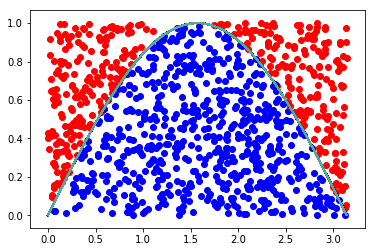

In [195]:
def integrate(num_samples=int(1e2), isPlot=False):
    # TO DO  
    estimate = 0
    sample_var = 0
    arr = []
    underCount = 0
    x = np.arange(0,np.pi,0.01)
    y = np.sin(x)
    
    for i in range(0,num_samples):
        a = np.random.uniform(0, np.pi)
        b = np.random.sample(1)
        arr.append([a,b])
        if b <= np.sin(a):
            if isPlot == True:
                plt.scatter(a,b, color='blue')
            underCount +=1 
        else:
            if isPlot == True:
                plt.scatter(a,b, color='red')
        if isPlot == True:
            plt.plot(x,y)
            
    estimate = underCount/num_samples
    sample_var = estimate*(1-estimate)
            
    return estimate*np.pi, sample_var
integrate(num_samples=int(1e3),isPlot=True)


In [181]:
integrate(num_samples=int(1e4))

(1.9961679720909544, 0.23166684)

**Part E**: In the simulation above, what is distribution of the random variable we're actually sampling and what is/are its parameters?  

This follows a binomial distribution with parameters p. We dont worry about n because in this case, its just 1

$$B(1,0.6366)$$

**Part F**: Compute the expected value of the random variable you described in **Part D** by hand.  Does this value agree with the exact value of the integral you computed in **Part A** and the estimated value you computed in **Part C**? 

The expected value of the random variable from part D is just:
$$ 1*(p) + 0*(1-p)$$
$$ 1*(.6366) + 0*(1-.6366)$$
$$ .6366 + 0$$
$$.6366$$

this does not agree with the integral because this value isnt an area, it is a probability

If we want to get the area, we need to multiply by the overall area where the points could be created, which in this case was $\pi$

**Part G**: Compute the variance of the random variable you described in **Part D** by hand.  Does this value agree with the sample variance observed in **Part C**? 

$Bin(1, 0.6354) = .6354*(1-.6354)$

$ = .2317$

This value does agree with the cample varuabce observed in Part C

### [25 points] Problem 2 - Sampling Freshies
***

Maureen Ferguson stands alone on the riverbank. Snow has come to Colorado and flakes collect on her majestic pelt and whiskers. She shivers them off not because she is cold but just because her otter reflexes have been honed by millenia of adaptation. She is a biological machine. An inspiration. 

She wanders into her otter-mansion, hungry. There are piles RiverSnax from the autumn harvest. These are no ordinary RiverSnax, of course. They must be inspected with statistical care so that they are with high probability of the finest quality. You see, Maureen's snax have a freshness score, measured in Freshies, named after Professor Charles Snaxavier Fraeshmann. The average RiverSnack from her current supplier is 91 Freshies, and the standard deviation is 6 Freshies. 

You are new on the job, excited to apply your CSCI 3022 knowledge, and keen to prove yourself in a big and changing world. You are in charge of sampling the RiverSnax. Your boss, Governor John Hickenlotter, tells you that you must take a sample of Snax and that the average freshness must be no less than 90 Freshies. If the average is below 90 Freshies, the whole pile of RiverSnax must be thrown away, rejected. The current system, when you arrive is to sample 30 snax from each pile to see if the average freshness is above the 90 Freshies threshold. 

**Part A**:  Say "Freshies Threshold" at least 10 times in a row, as quickly as possible. Do not show your work. 



In [24]:
def sayMyNameX(x = 10, name = "Freshies Threshold",question = True):
    string = ''
    for i in range(x):
        string+=name
    if question == True:
        return string+ " why"
    else:
        return string
sayMyNameX()

'Freshies ThresholdFreshies ThresholdFreshies ThresholdFreshies ThresholdFreshies ThresholdFreshies ThresholdFreshies ThresholdFreshies ThresholdFreshies ThresholdFreshies Threshold why'

In [183]:
#Try it yourself! :D
sayMyNameX(name="", question=False)

''

**Part B**: What is the probability that a RiverSnack is rejected under the current system of 30 samples?

$\frac{90-91}{\frac{6}{\sqrt{30}}}$ => $\frac{-1}{\frac{6}{\sqrt{30}}}$ => $P(Z > \frac{-\sqrt{30}}{6})$ => .1807 or 18.07%

In [72]:
me = 91
x = (90-me)/(6/np.sqrt(30))
stats.norm.cdf(x)


0.18065521426308934

**Part C**: Well, that's not good enough. Not for our Maureen Ferguson. You propose to Governor Hickelotter that you will get RiverSnax from a new supplier. The new supplier's RiverSnax have a standard deviation of 6 Freshies, just like the old ones. But, they can harvest the RiverSnax from various parts of the river, to adjust the average Freshy level of the RiverSnax, $\mu$. Gov. Hickenlotter's requirement is that the probability that a pile of RiverSnax is rejected is less than 0.001. What is the minimum average Freshy level $\mu$ needed in order to achieve the Governor's requirement?


In [73]:
stats.norm.ppf(.001)

-3.0902323061678132

$$Z_{.001} = -3.0902$$

$${90 - \mu}\over \frac{6}{\sqrt{30}}$$

$$\frac{6}{\sqrt{30}} * -3.0902 = {90 - \mu}$$

$$\mu = 90 - (\frac{6}{\sqrt{30}} * -3.0902)$$

In [192]:
print (90 - (6/np.sqrt(30) * stats.norm.ppf(.001)))

93.385179884


The freshness level we need is **93.385**

**Part D**: You are about to submit your report, given your answer above, when you find out that the new supplier is going out of business. Ugh.  You are stuck with the old RiverSnax. But the Governor's requirement still stands: the probability that a pile of RiverSnax is rejected must be less than 0.001. You decide you'll just take more samples from the existing piles. Surely, the number must be greater than 30, but... what is the minimum number of samples that will ensure that each pile of RiverSnax is rejected with probability less than $0.001$?

$$Z_{.001} = -3.0902$$

$${90 - 91}\over \frac{6}{\sqrt{n}}$$

$$\sqrt{n}*(90 - 91)\over 6$$

$$-3.0902 = \frac{\sqrt{n}*(90 - 91)}{6}$$

$$-3.0902*6 = \sqrt{n} * (90-91)$$

$$\frac{-3.0902*6}{(90-91)} = \sqrt{n}$$

$$(\frac{-3.0902*6}{(90-91)})^2 = n$$

In [193]:
y = stats.norm.ppf(.001)*6/-1
print(y**2)

343.783285419


So we need to sample **344** RiverSnax

**[Extra Credt - 2 points] Part E**: Draw an ASCII picture of Maureen Ferguson. 

 


          .----.__            
         / c  •  _`;          
         |     .--'           
          \   (               
          /  -.\              
         / .    \            
        /  \    |
       ;    `-. `.
       |      /`'.`.
       |      |   \ \
       |    __|    `'
       ;   /   \
      ,'        |
     (_`'---._ /--,
       `'---._`'--..__
              `''''--, )
                _.-'`,`
                 ````

### [40 points] Problem 3 - Not-so-Easy Peasy Plinko 
***

[Plinko](http://priceisright.wikia.com/wiki/Plinko), the shining jewel of the gameshow [Price is Right](https://en.wikipedia.org/wiki/The_Price_Is_Right), is a staple of American culture.  Luckily for us, it's also chalk-full of interesting ideas from probability and statistics. The game involves dropping a disc onto an inclined board of pegs and letting it bounce around until it lands in a bin with an associated cash value. Players get to drop some number of discs down the Plinko board and keep their winnings.   

In class we looked at a simplified version of Plinko:  

![alt text](http://danlarremore.com/misc/plinko1.png)


In real life, Plinko has boundaries, positioned symmetrically around the center $c$ at positions $\ell$ and $r$ s.t. $|c-\ell| = |c+r|$. The effect of the boundaries are that when the Plinko disc hits the boundary, it can only move back toward the center. In other words, if the disc hits the boundary at $\ell$, it can only go right at that level. Likewise, if the disc hits the boundary at $r$, it can only go left at that level. 

For instance, the following board depicts a Plinko game with boundaries at $0.5$ (halfway between the centers of Buckets 0 and 1) and $5.5$ (halfway between Buckets 5 and 6)  The red pegs indicate boundary pegs on which the disc always moves toward the center.   

![alt text](http://danlarremore.com/misc/plinko2.png)


**Part A**: Write a simulator of Plinko that models the disc moving through each of the 6 rows of pegs to its final destination in one of the 7 bins. Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$ when the probability of moving left or right when hitting a peg is equal to $p = 0.5$. 

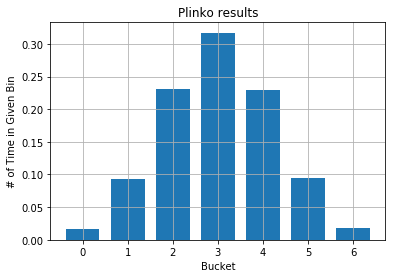

In [188]:
def plinkoSim(sims = 10000):
    arr = []
    p = .5
    for i in range(sims):
        pos = 3
        for ii in range(6):
            pos += np.random.choice([-.5,.5], p=[1-p, p])
        arr.append(pos)
    df = pd.DataFrame(arr)
    df.hist(bins = [ii-.5 for ii in range (8)],normed = True, rwidth = .75)
    plt.title("Plinko results")
    plt.xlabel("Bucket")
    plt.ylabel("# of Time in Given Bin")
plinkoSim()

**Part B**: Let $X$ be the random variable corresponding to the Bucket that the disc lands in.  Write down the **true** PMF for $X$. (**Hint**: It might be helpful to reflect back on the discussion from Lecture 11). 

the chance of landing in a given bucket is $p^k * (1-p)^{n-k}$

p is the probability, n is the number of buckets minus 1, and k is the bucket you want to land in, however this does not take into consideration the different ways to land in the same bucket

$$P(X) = \binom{n}{k}*p^k(1-p)^{n-k}$$
where in this case, n is 7, k is the desired bucket, and p is .5

**Part C**: Write a simulator for Plinko with boundaries. Your code should be similar to your code from **Part A**, but should take in two variable boundaries, left_bound and right_bound, corresponding to the location of the left boundary and right boundary, respectively. 


In [184]:
def plinkoSimBoundary(leftB, rightB, sims = 10000, isPlot = True):
    arr = []
    p = .5
    for i in range(sims):
        pos = 3
        for ii in range(6):
            pos += np.random.choice([-.5,.5], p=[1-p, p])
            if pos < leftB:
                pos = leftB+.5
            if pos > rightB:
                pos = rightB-.5
        arr.append(pos)
    if isPlot == True:
        df = pd.DataFrame(arr)
        df.hist(bins = [ii-.5 for ii in range (8)], normed = True, rwidth = .75)
        plt.title("Plinko results")
        plt.xlabel("Bucket")
        plt.ylabel("# of Time in Given Bin")
    else:
        print(np.mean(arr))

**Part D**: Consider the board with left_bound $= 0.5$ which looks as follows: 

![alt text](http://danlarremore.com/misc/plinko3.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$. Compare the approximate PMF for this board to the no-boundary board from **Part A**. Explain the mechanism that causes the differences between the two PMFs in words. 




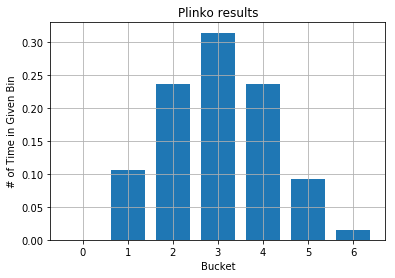

In [185]:
plinkoSimBoundary(0.5,6)

**Part E**: Now consider the board with left_bound $= 1.5$ which looks as follows: 

![alt text](http://danlarremore.com/misc/plinko4.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$. Compare the approximate PMF for this board to the boards from **Parts A** and **D**. Explain the mechanism that causes the differences between the three PMFs in words. 


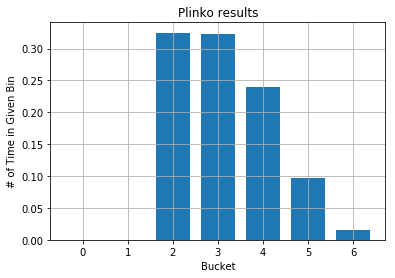

In [186]:
plinkoSimBoundary(1.5,6)

**Part F**: OK, one more. Consider the board with left_bound $= 1.5$ and right_bound $= 5.5$ which looks as follows: 

![alt text](http://danlarremore.com/misc/plinko5.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Use your observations from **Parts A-D** to write down the **true** PMF of $X$. 




P(X=k) = $P(X) = \binom{n}{k}*p^k(1-p)^{n-k}$

P(0): 0 (this probability was added to 3 because of mirrored probability)

P(1): 0 (this probability was added to 2 because of mirrored probability)

P(2): 0.328

P(3): 0.329

P(4): 0.234

P(5): 0.110

P(6): 0 (this probability was added to 5 because of mirrored probability)

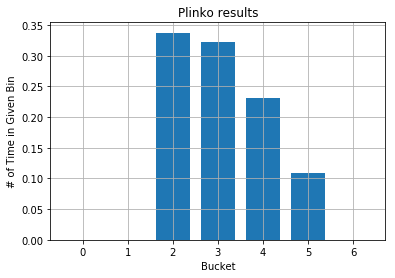

In [187]:
plinkoSimBoundary(1.5,5.5)

**Part G**: Suppose I challenge you to a _friendly_ game of Plinko on the board from **Part F**. I offer to pay you a dollar amount equal to the bucket that your disc lands in, but also charge you a flat fee for each disc that you play.  How much should I charge you per disc so that we break even in the long run? 

In [176]:
plinkoSimBoundary(1.5,5.5, isPlot=False)

3.1257


### Challenge Fun Problem [0 points] - Real-Deal Plinko 
***

Implement a full-blown Plinko simulator based on the actual board from Price is Right, which allows you to choose where to place the disc at the top of the board.  

![alt text](https://i.pinimg.com/736x/7d/4b/5b/7d4b5b9ba5cdeceea16433eaadeeaf13--mash-game-plinko-game.jpg)

You can actually do this using mostly your code from **Problem 3** and some careful handling of the boundaries relative to where you drop the disc.  Investigate questions like "What is the optimal position to drop the disc to maximize expected winnings?" and "What are the expected winnings if you play Plinko optimally?"

Once you're done with that, it's time to go full-on Meta-Plinko.  Suppose the boundaries of the Plinko board are in their true positions from the real game show, but the board can have an arbitrary number of rows.  Is there a minimum number of rows the board can have at which point the PMF for the distribution becomes approximately uniform?  If not, is there a Bucket, or set of Buckets, that always have a greater chance of claiming the disc? 
